<a href="https://colab.research.google.com/github/demekeendalie/Fine-tuning-bert-model-for-amharic-news-classification/blob/main/word2vec_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from gensim.models import Word2Vec
import gensim

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
import os
dataset_path = 'C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small'
data = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    # Check if it's a directory (category folder)
    if os.path.isdir(category_path):
        print(category_path)
        for filename in os.listdir(category_path):
            if filename.endswith('.txt'):
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        article_text = file.read().strip()  # Read and remove leading/trailing spaces
                        data.append({'articles': article_text, 'category': category})
                except Exception as e:
                    print(f"Error reading file {file_path}: {e}")

dataframe = pd.DataFrame(data)

C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Avto
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Ayollar
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Iqtisodiyot
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Jinoyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Madaniyat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Pazandachilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Qonunchilik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Salomatlik
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Siyosat
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Sport
C:/Users/E-MaxPCShop/Desktop/Uzbek_News_Dataset_small\Texnologiya


In [4]:
print(dataframe)
category_counts = dataframe['category'].value_counts()
print(category_counts)

                                                 articles     category
0       Tesla barcha elektromobillarining narxini oshi...         Avto
1       UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto
2       Lego’ning 358 mingdan ortiq detali yordamida t...         Avto
3       Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto
4       Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto
...                                                   ...          ...
102955  Sony 7 mm qalinlikdagi yangi Xperia T3 smartfo...  Texnologiya
102956  Acer kompaniyasining yangi Iconia A1-830 plans...  Texnologiya
102957  LG G3 ommaboplikda Samsung Galaxy S5’ni ortda ...  Texnologiya
102958  Vertu kompaniyasi 8 ming yevrolik titan smartf...  Texnologiya
102959  Apple yangi iOS 8 operatsion tizimini taqdim e...  Texnologiya

[102960 rows x 2 columns]
Texnologiya      17541
Qonunchilik      14779
Sport            13403
Madaniyat        12798
Siyosat          12247
Iqtiso

In [5]:
# changing category to numeric
label=pd.Categorical(dataframe['category']).codes
label=pd.DataFrame(label)
dataframe['labels']=pd.DataFrame(label)
print(dataframe)

unique_category_labels = dataframe[['category', 'labels']].drop_duplicates()
print(unique_category_labels)

                                                 articles     category  labels
0       Tesla barcha elektromobillarining narxini oshi...         Avto       0
1       UzAuto Motors — o‘rindiq isitish modeli va mag...         Avto       0
2       Lego’ning 358 mingdan ortiq detali yordamida t...         Avto       0
3       Namanganda “Moskvich” ariqqa ag‘darilib ketish...         Avto       0
4       Qo‘qonda YPX xodimini mashina ustida sudrab ke...         Avto       0
...                                                   ...          ...     ...
102955  Sony 7 mm qalinlikdagi yangi Xperia T3 smartfo...  Texnologiya      10
102956  Acer kompaniyasining yangi Iconia A1-830 plans...  Texnologiya      10
102957  LG G3 ommaboplikda Samsung Galaxy S5’ni ortda ...  Texnologiya      10
102958  Vertu kompaniyasi 8 ming yevrolik titan smartf...  Texnologiya      10
102959  Apple yangi iOS 8 operatsion tizimini taqdim e...  Texnologiya      10

[102960 rows x 3 columns]
            category  lab

In [6]:
# mixing each categories and thier labels
dataframe=dataframe.sample(frac=1)

In [7]:
dataframe['word_len'] = dataframe['articles'].str.split().str.len()
print(dataframe['word_len'].mean())
print(dataframe)

mean_word_len_by_category = dataframe.groupby('category', as_index=False)['word_len'].mean()
print(mean_word_len_by_category)

278.5514763014763
                                                 articles     category  \
99198   “Malika” savdo markazida sotilayotgan fotokame...  Texnologiya   
83531   Ronaldu: «Ishqibozimdan bu qadar iliq soʻzlarn...        Sport   
25251   Aktrisa Shahzoda Matchonova: Turkmanistonda o‘...    Madaniyat   
100236  USENET 2016: sayt ishga tushdi, ma’ruzachilar ...  Texnologiya   
52263   AJ oʻz aksiyalarini yangi qoidalar boʻyicha jo...  Qonunchilik   
...                                                   ...          ...   
1315    AQSh maxsus xizmatiga tegishli bo‘lgan Plymout...         Avto   
21096   O`rta Chirchiqda voyaga etmagan qizaloqni zo`r...      Jinoyat   
15830   Neft narxi 150 dollargacha qimmatlashishi mumk...  Iqtisodiyot   
95218   BEELINE\n\nXalqaro qo`ng`iroqlarni tez-tez ama...  Texnologiya   
98241   Jahondagi eng yirik samolyot ilk bor uchish-qo...  Texnologiya   

        labels  word_len  
99198       10       222  
83531        9        87  
25251       

In [8]:
#normalizarion
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalization(input_token):
    rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
    return rep2


In [9]:
# apply normalization and special characters removal
# dataframe['articles']=dataframe['articles'].apply(lambda x: normalization(x))

In [10]:
# special symbol removal
dataframe['articles']=dataframe['articles'].str.replace("O'",'O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("G'",'G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("o'",'o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("g'",'g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('O`','O‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('G`','G‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('o`','o‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace('g`','g‘',regex=True)
dataframe['articles']=dataframe['articles'].str.replace("[^\w\s‘’`']",'',regex=True)
dataframe['articles'] = dataframe['articles'].str.replace('\n\n', '. ', regex=False)
dataframe['articles'] = dataframe['articles'].str.replace('\n', '. ', regex=False)
print(dataframe)
print(dataframe.head())

                                                 articles     category  \
99198   Malika savdo markazida sotilayotgan fotokamera...  Texnologiya   
83531   Ronaldu Ishqibozimdan bu qadar iliq soʻzlarni ...        Sport   
25251   Aktrisa Shahzoda Matchonova Turkmanistonda o‘z...    Madaniyat   
100236  USENET 2016 sayt ishga tushdi ma’ruzachilar an...  Texnologiya   
52263   AJ oʻz aksiyalarini yangi qoidalar boʻyicha jo...  Qonunchilik   
...                                                   ...          ...   
1315    AQSh maxsus xizmatiga tegishli bo‘lgan Plymout...         Avto   
21096   O‘rta Chirchiqda voyaga etmagan qizaloqni zo‘r...      Jinoyat   
15830   Neft narxi 150 dollargacha qimmatlashishi mumk...  Iqtisodiyot   
95218   BEELINE. Xalqaro qo‘ng‘iroqlarni teztez amalga...  Texnologiya   
98241   Jahondagi eng yirik samolyot ilk bor uchishqo‘...  Texnologiya   

        labels  word_len  
99198       10       222  
83531        9        87  
25251        4       168  
100

In [11]:
# removing digits from the dataset
dataframe['articles']=dataframe['articles'].str.replace('\d+','',regex=True)

In [12]:
dataframe=dataframe[['articles','labels']]
print(dataframe)

                                                 articles  labels
99198   Malika savdo markazida sotilayotgan fotokamera...      10
83531   Ronaldu Ishqibozimdan bu qadar iliq soʻzlarni ...       9
25251   Aktrisa Shahzoda Matchonova Turkmanistonda o‘z...       4
100236  USENET  sayt ishga tushdi ma’ruzachilar aniqla...      10
52263   AJ oʻz aksiyalarini yangi qoidalar boʻyicha jo...       6
...                                                   ...     ...
1315    AQSh maxsus xizmatiga tegishli bo‘lgan Plymout...       0
21096   O‘rta Chirchiqda voyaga etmagan qizaloqni zo‘r...       3
15830   Neft narxi  dollargacha qimmatlashishi mumkin ...       2
95218   BEELINE. Xalqaro qo‘ng‘iroqlarni teztez amalga...      10
98241   Jahondagi eng yirik samolyot ilk bor uchishqo‘...      10

[102960 rows x 2 columns]


In [13]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(dataframe['articles'],dataframe['labels'], test_size=0.20, random_state=42)

In [14]:
from gensim.models import Word2Vec
sentences = [document.split() for document in X_train]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

In [15]:
print(w2v_model)

Word2Vec(vocab=143961, vector_size=100, alpha=0.025)


In [16]:
import numpy as np

def vectorize(sentence):
    words = sentence.split()
    
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
clf = MLPClassifier(hidden_layer_sizes=(100,),activation='relu', solver='adam', max_iter=1000, verbose=True)
clf.fit(X_train, y_train)  # relu

Iteration 1, loss = 0.50662377
Iteration 2, loss = 0.30330348
Iteration 3, loss = 0.28028014
Iteration 4, loss = 0.26593576
Iteration 5, loss = 0.25364667
Iteration 6, loss = 0.24455322
Iteration 7, loss = 0.23641418
Iteration 8, loss = 0.23087813
Iteration 9, loss = 0.22600675
Iteration 10, loss = 0.22155560
Iteration 11, loss = 0.21767486
Iteration 12, loss = 0.21426389
Iteration 13, loss = 0.21071852
Iteration 14, loss = 0.20836527
Iteration 15, loss = 0.20565828
Iteration 16, loss = 0.20372544
Iteration 17, loss = 0.20104896
Iteration 18, loss = 0.19931524
Iteration 19, loss = 0.19716496
Iteration 20, loss = 0.19568673
Iteration 21, loss = 0.19374119
Iteration 22, loss = 0.19174304
Iteration 23, loss = 0.19053789
Iteration 24, loss = 0.18857346
Iteration 25, loss = 0.18784607
Iteration 26, loss = 0.18595025
Iteration 27, loss = 0.18417292
Iteration 28, loss = 0.18278610
Iteration 29, loss = 0.18163381
Iteration 30, loss = 0.18071588
Iteration 31, loss = 0.17940790
Iteration 32, los

Iteration 253, loss = 0.09921552
Iteration 254, loss = 0.09946193
Iteration 255, loss = 0.09900645
Iteration 256, loss = 0.09974557
Iteration 257, loss = 0.09879894
Iteration 258, loss = 0.09942909
Iteration 259, loss = 0.09854550
Iteration 260, loss = 0.09790784
Iteration 261, loss = 0.09795987
Iteration 262, loss = 0.09784712
Iteration 263, loss = 0.09778923
Iteration 264, loss = 0.09787563
Iteration 265, loss = 0.09766450
Iteration 266, loss = 0.09715336
Iteration 267, loss = 0.09747643
Iteration 268, loss = 0.09728461
Iteration 269, loss = 0.09709607
Iteration 270, loss = 0.09678310
Iteration 271, loss = 0.09687120
Iteration 272, loss = 0.09677372
Iteration 273, loss = 0.09628180
Iteration 274, loss = 0.09646706
Iteration 275, loss = 0.09619999
Iteration 276, loss = 0.09561392
Iteration 277, loss = 0.09593783
Iteration 278, loss = 0.09589254
Iteration 279, loss = 0.09542257
Iteration 280, loss = 0.09551113
Iteration 281, loss = 0.09536802
Iteration 282, loss = 0.09539144
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

Accuracy: 0.9043317793317793
Precision: 0.9041420704202526
Recall: 0.9043317793317793
F1 score: 0.904150940788012
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1179
           1       0.76      0.75      0.75       527
           2       0.83      0.83      0.83      2378
           3       0.93      0.94      0.93       850
           4       0.94      0.94      0.94      2551
           5       0.96      0.98      0.97       421
           6       0.99      0.99      0.99      3023
           7       0.84      0.84      0.84       998
           8       0.90      0.88      0.89      2513
           9       0.98      0.98      0.98      2652
          10       0.87      0.90      0.88      3500

    accuracy                           0.90     20592
   macro avg       0.89      0.89      0.89     20592
weighted avg       0.90      0.90      0.90     20592



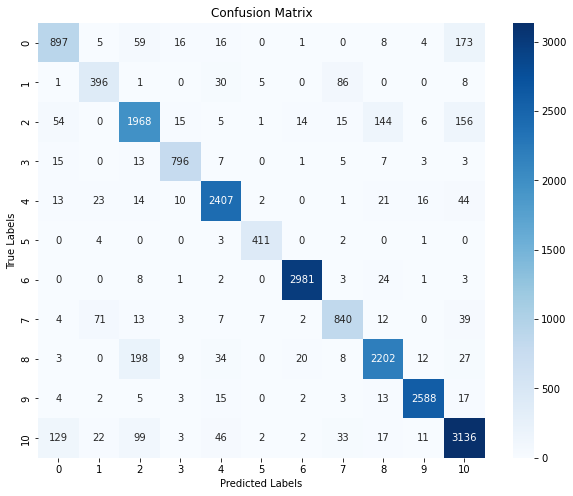

Confusion Matrix:
[[ 897    5   59   16   16    0    1    0    8    4  173]
 [   1  396    1    0   30    5    0   86    0    0    8]
 [  54    0 1968   15    5    1   14   15  144    6  156]
 [  15    0   13  796    7    0    1    5    7    3    3]
 [  13   23   14   10 2407    2    0    1   21   16   44]
 [   0    4    0    0    3  411    0    2    0    1    0]
 [   0    0    8    1    2    0 2981    3   24    1    3]
 [   4   71   13    3    7    7    2  840   12    0   39]
 [   3    0  198    9   34    0   20    8 2202   12   27]
 [   4    2    5    3   15    0    2    3   13 2588   17]
 [ 129   22   99    3   46    2    2   33   17   11 3136]]


In [19]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print('Recall:', recall_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print('F1 score:', f1_score(y_test, y_pred, average='weighted')) # Changed to 'weighted' average
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# If you want to print the matrix as text:
print("Confusion Matrix:")
print(cm)

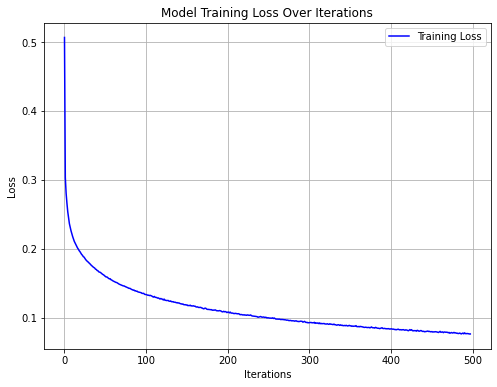

Iteration 1, loss = 0.07651091
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07652386
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.07581789
Iteration 1, loss = 0.07591098
Iteration 1, loss = 0.07687954
Iteration 1, loss = 0.07588400
Iteration 1, loss = 0.07615981
Iteration 1, loss = 0.07580624
Iteration 1, loss = 0.07539770
Iteration 1, loss = 0.07615900
Iteration 1, loss = 0.07527864
Iteration 1, loss = 0.07612284
Iteration 1, loss = 0.07564597
Iteration 1, loss = 0.07620103
Iteration 1, loss = 0.07552183
Iteration 1, loss = 0.07564966
Iteration 1, loss = 0.07522486
Iteration 1, loss = 0.07524318
Iteration 1, loss = 0.07531135
Iteration 1, loss = 0.07548755
Iteration 1, loss = 0.07537861
Iteration 1, loss = 0.07511758
Iteration 1, loss = 0.07486205
Iteration 1, loss = 0.07498875
Iteration 1, loss = 0.07446500
Iteration 1, loss = 0.07392578
Iteration 1, l

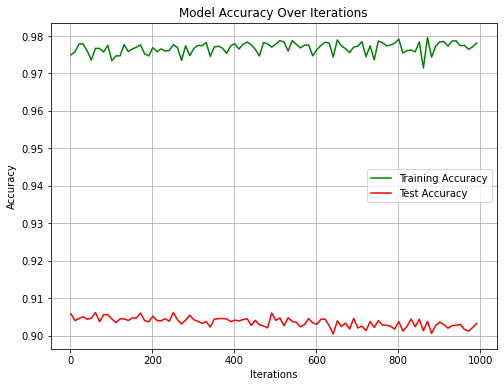

In [20]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(clf.loss_curve_, label='Training Loss', color='blue')
plt.title('Model Training Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Tracking accuracy over iterations (alternative method)
train_scores = []
test_scores = []

for i in range(1, clf.max_iter + 1, 10):  # Check accuracy every 10 iterations
    clf.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

# Plot accuracy over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, clf.max_iter + 1, 10), train_scores, label='Training Accuracy', color='green')
plt.plot(range(1, clf.max_iter + 1, 10), test_scores, label='Test Accuracy', color='red')
plt.title('Model Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()